# What is SpaCy?

[SpaCy](https://spacy.io/) is an **open source** "industrial strength NLP framework". It's core design principle is to approach state-of-the-art performance (SOTA), but focus on deployability and usability in scalable real life contexts. This is in stark contrast with learning / experimentation focused frameworks like [NLTK](https://www.nltk.org/) as well as all the cutting edge prototype code being open sourced. 

## Design principles

With this in mind, SpaCy is endeavoring to approach the SOTA, but only as far as "tried and proven" models allow. Eg. for that reason SpaCy 1.x employed an averaged perceptron model for part-of-speech tagging ion favor of more complex models because of it's absolutely superior speed. SpaCy 2.x abandoned this approach in favor of a more sophisticated, but still low complexity (residual) convolutional neural network architecture (and [Bloom embeddings](https://arxiv.org/abs/1706.03993) for combatting the difficulties of sparse, "some-hot" encoded data).

More on the design principles and solutions behind SpaCy can be found here:

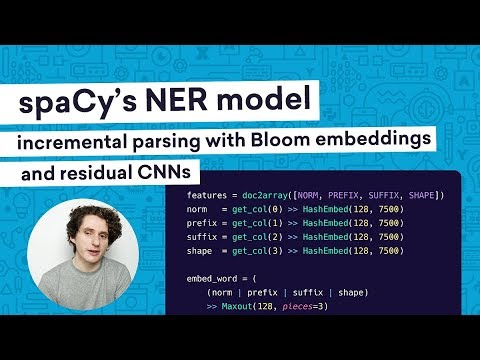

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('sqDHBH9IjRU')

## "Complete" pipeline approach

SpaCy tries to unify many common NLP tasks under a single "end-to-end" processing pipeline as follows:

<img src="https://d33wubrfki0l68.cloudfront.net/16b2ccafeefd6d547171afa23f9ac62f159e353d/48b91/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg" width=70%>

A complete API introduction can be found [here](https://spacy.io/api).

A more complete overview of the objects and the services they provide are as follows:

<img src="https://spacy.io/architecture-bcdfffe5c0b9f221a2f6607f96ca0e4a.svg" width=60%>

### Main objects and their functions in the pipeline

A detailed list of objects and their functions from the API documentation:

<img src="http://drive.google.com/uc?export=view&id=1hhVO-Nbtqg1An0iCa6eARVxIpHIbAlBL" width=60%>

<img src="http://drive.google.com/uc?export=view&id=1CkIlZmunvhGMeV5xVkPVnAf80mOgpCEA" width=60%>

<img src="http://drive.google.com/uc?export=view&id=1NqVWtCz2cH76CluzfmUY_qwgk2cW7XgP" width=60%>

## Model management

As seen on the graphic above, the main object of processing ins the `nlp` object **representing a complete processing model for a given language**, containing all the specific processing steps needed for the given language.

The models are **not part** of the default installation, so `pip install spacy` only deploys the framework, further commands are needed to download a language specific model.

In case of eg. English the additional commands needed for model download are:

<img src="http://drive.google.com/uc?export=view&id=1i7pt-jQZZigGh6dgcirsVH8PxodHmRxT" width=50%>

(Please bear in mind, that the first line is executed in the command line of the appropriate Python environment, the others are already inside a running interpreter / code.)

The complete list of available models can be found [here](https://spacy.io/usage/models).

## The `Doc` object and it's services


Though SpaCy's documentation is of very high quality, [here](https://nlpforhackers.io/complete-guide-to-spacy/) is also a simple guide for usage.

Please bear in mind, that many of the concepts referenced here might only make sense after deeper introduction to NLP. 

In [ ]:
!pip install -U spaCy
# Download one of the complete models for English
!python -m spacy download en_core_web_sm

In [2]:
import spacy

# Instantiate the main analysis object with the downloaded model.
nlp = spacy.load("en_core_web_sm")

In [3]:
raw_text = '''The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful natural language processing systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "Why do you say your head hurts?".'''

In [4]:
#Run the complete analysis pipeline on the text.
doc=nlp(raw_text)

Steps of the pipeline could be disabled by the parameter: `disable=["tagger", "parser"]`...

After this command, the `doc` object holds all the analysis results for the given document and gives nice accessors.

### Token level

In [44]:
for token in doc[:5]:
    print(token.text)
print("...")


token=doc[71]
print()
print("token.text:",token.text)
print("token.i:",token.i,"\t\t This is the integer sequence index of the token (position).")
print("token.idx:",token.idx, "\t\t WARNING! This is vocabulary index, NOT sequence position!")
print("token.lemma_:",token.lemma_, "\t Here the basic lemmatization in English is visible.")
print("token.is_punct:",token.is_punct,"\t Boolean value deciding if the token represents a puntuation mark.")
print("token.is_space:",token.is_space,"\t Is this a space?")
print("token.shape_:",token.shape_,"\t Info about capitalization and alpha / numeric constituents.")
print("token.pos_:",token.pos_,"\t Part-of-speech tag of the given token - can be part of a multi token 'chunk'.")
print("token.tag_:",token.tag_,"\t Tag regarding the position of this token in the general dependency parse tree.")
print("token.is_stop:",token.is_stop,"\t Is this a common 'stopword'?")
print("...")

The
history
of
natural
language
...

token.text: sentences
token.i: 71 		 This is the integer sequence index of the token (position).
token.idx: 421 		 WARNING! This is vocabulary index, NOT sequence position!
token.lemma_: sentence 	 Here the basic lemmatization in English is visible.
token.is_punct: False 	 Boolean value deciding if the token represents a puntuation mark.
token.is_space: False 	 Is this a space?
token.shape_: xxxx 	 Info about capitalization and alpha / numeric constituents.
token.pos_: NOUN 	 Part-of-speech tag of the given token - can be part of a multi token 'chunk'.
token.tag_: NNS 	 Tag regarding the position of this token in the general dependency parse tree.
token.is_stop: False 	 Is this a common 'stopword'?
...


Fro a complete list of information held by the `Token` object, see [here](https://spacy.io/api/token).

### Syntactic analysis

As already seen above, over the tokenized text a complete syntactic analysis was also carried out.

Some of the information was already exposed on the token level, like:

In [45]:
spacy.explain("NNS")

'noun, plural'

But there is a complete higher level analysis regarding sentences and sentence structure.

(Fun fact: SpaCy's dependency analysis is a "first class citizen" and influences even the sentence boundary decisions.)

There is a nice visualization tool called [displaCy](https://spacy.io/api/top-level#displacy) that is built into SpaCy, and can give a nice view of the dependency structure:

In [54]:
from spacy import displacy

displacy.render(list(doc.sents)[0], style="dep", options={"compact":True, "distance":75})

Please note above, how we could access the generator over the sentences, to elegantly address the first sentence! (Had to cast it to a list, though to be subscriptable.)

A very similar interface exists for phrase analysis and "chunks".

### Vector semantics

Beyond syntactic analysis SpaCy has built-in support for vector based semantics. The similarity measurements and corresponding functions are not restricted to individual tokens, but can be accessed on a `Span` of text also. Special spans are for example detected **named entities** in the text.


In [55]:
doc.ents

(NLP,
 the 1950s,
 1950,
 Alan Turing,
 Computing Machinery and Intelligence,
 1954,
 more than sixty,
 Russian,
 English,
 three or five years,
 1966,
 ten-year,
 the late 1980s,
 first,
 the 1960s,
 SHRDLU,
 ELIZA,
 Rogerian,
 Joseph Weizenbaum,
 between 1964 and 1966,
 ELIZA)

In [62]:
turing_similarity_russian = doc.ents[3].similarity(doc.ents[7])
turing_similarity_english = doc.ents[3].similarity(doc.ents[8])

print(turing_similarity_russian,turing_similarity_english)
assert turing_similarity_russian < turing_similarity_english

0.3024064 0.5180206


/home/alatus/anaconda3/envs/nlp_course/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/home/alatus/anaconda3/envs/nlp_course/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always

In this case, proper vectorspace was not loaded, hence the ugly `warning`, but it is still true, that Turing is more English than Russian...

These word / span vectors - as we will see later - are excellent inputs for higher level processing tasks!

## Customization

It is well worth noting, that SpaCy is very cutomization friendly. Every step of the pipeline can be extended or replaced, eg. there is a complete guide on extending the tokenization with custom rules / cases [here](https://spacy.io/usage/linguistic-features#special-cases).

# Model training and custom objects

The creators of SpaCy are well aware of the fact, that no "one size fits all" approach can be taken for problems and domains, so they laid great emphasis on the possibility to train custom models inside SpaCy for any specific task at hand.

<img src="https://spacy.io/training-73950e71e6b59678754a87d6cf1481f9.svg" width=50%>

An extensive [guide on training](https://spacy.io/usage/training) is also available.

## Prodigy as a tool

Aiming at streamlining the process of custom annotations (be it own document classes or special "entities" that have to be detected in a text, eg. for intent classification and entity extraction respectively in chat situations) the creators of SpaCy developed a **proprietary annotation tool** [Prodigy](https://prodi.gy/). It integrates seamlessly with SpaCy, has strong features in **active learning**, as well as an ergonomic UI. 

For these two use cases see [this](https://www.youtube.com/watch?v=l4scwf8KeIA) and [this](https://www.youtube.com/watch?v=5di0KlKl0fE) video.

<img src="https://d33wubrfki0l68.cloudfront.net/4545947e217dfc165a74d37361289cc1a8cc0549/a8af1/assets/img/features_ner_manual.gif" width=50%>

The active [learning approach](https://en.wikipedia.org/wiki/Active_learning_(machine_learning)) in this case means, that the tool will do an iterative loop of model training behind the scenes, and ask for annotation in case of those training examples, which are decreasing uncertainity of the model, thus leading to the **minimalization of annotation effort**.   

<img src="https://miro.medium.com/max/1862/1*d-a_ubqDgEw7PeGA5miHGQ.gif" width=60%>

### Alternatives

Since Prodigy is a proprietary tool, one might be tempted to consider other alternatives, which - unsurprisingly - do exist.

Take for example [Doccano](https://github.com/chakki-works/doccano), an annotator app easily deployed to the cloud application provider [Heroku](https://www.heroku.com/).

<img src="https://miro.medium.com/max/1575/0*PLZNW4T7yICtvE97.gif" width=60%>

# SpaCy in other projects

Since it's inception SpaCy became quite popular, and is the go-to choice for many open source and commercial projects building on top of it.

Many notable pipeline extensions (like [Textacy](https://chartbeat-labs.github.io/textacy/) or [AllenNLP](https://allennlp.org/)) or task specific frameworks (like [RASA](https://rasa.com/) for chatbots) are noteworthy. 

The full [SpaCy Universe](https://spacy.io/universe) is worth taking a look.
